AI - TP1_2

Bastien SAUVAT et Bastien FAISANT

# Exercise 1 : Building a neural network to classify texts (multi-layer perceptron (MLP))

*Objective : Understand the notion of over-fitting and under-fitting.*

In [106]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.layers import Embedding, Dropout, GlobalAveragePooling1D, Dense
import re
import string
import matplotlib.pyplot as plt

## Load the dataset

In [107]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [108]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [109]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [110]:
x_data = df['review']
y_data = df['sentiment']

# Encode sentiment 
y_data = y_data.replace('positive', 1)
y_data = y_data.replace('negative', 0)


## Split Dataset

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)
print('Validation Set')
print(y_val, '\n')
print(y_val)

Train Set
9432     Loved this show...smart acting, smart dialog, ...
24180    This is a long lost horror gem starring Sydney...
29035    Still funny after all these years. Midnight Ma...
42555    A conversation about how Jan-Michael Vincent i...
7466     What ever happened to shows with united parent...
                               ...                        
42981    This is about a mad scientist who creates a ha...
11764    OK, a slasher movie. a very, very stupid slash...
31249    I agree that the movie is a little slow at spo...
15226    You can't really call Roy Andersson prolific, ...
42526    Fortunately for us Real McCoy fans (most likel...
Name: review, Length: 40000, dtype: object 

38492    This is one of those movies that they did too ...
33565    Somebody decided to make a "black version" of ...
37886    A notorious big budget flop when released. Thi...
46053    I agree that this film was spectacular. The wa...
48231    Just watched the film for the 3rd time and enj...
 

## Data Preprocessing

### Standardization

In [112]:
def standardization(data):
    lowercase = tf.strings.lower(data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation), '')

### Tokenization and Vectorization

In [113]:
max_features = 10000
sequence_length = 250

vectorize_layer = tf.keras.layers.TextVectorization(
    standardize=standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [114]:
vectorize_layer.adapt(x_train)

x_train = vectorize_layer(x_train)
x_test = vectorize_layer(x_test)
x_val = vectorize_layer(x_val)

### Create the model

In [115]:
embedding_dim = 16

In [116]:
model = tf.keras.Sequential([
  Embedding(max_features + 1, embedding_dim),
  Dropout(0.2),
  GlobalAveragePooling1D(),
  Dropout(0.2),
  Dense(1)])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_8 (Dropout)         (None, None, 16)          0         
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
________________________________________________

In [117]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the Model

In [122]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2949 - accuracy: 0.9003 - val_loss: 0.3640 - val_accuracy: 0.8836
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2787 - accuracy: 0.9074 - val_loss: 0.3761 - val_accuracy: 0.8880
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2714 - accuracy: 0.9070 - val_loss: 0.3943 - val_accuracy: 0.8874
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2571 - accuracy: 0.9116 - val_loss: 0.4315 - val_accuracy: 0.8872
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2555 - accuracy: 0.9165 - val_loss: 0.4525 - val_accuracy: 0.8858
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2562 - accuracy: 0.9147 - val_loss: 0.4590 - val_accuracy: 0.8842
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2798 - accuracy: 0.9062 - val_loss: 0.4776 - val_accuracy:

### Evaluate Model Performance

In [126]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

157/157 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.8862
Loss:  0.4770936071872711
Accuracy:  0.8862000107765198


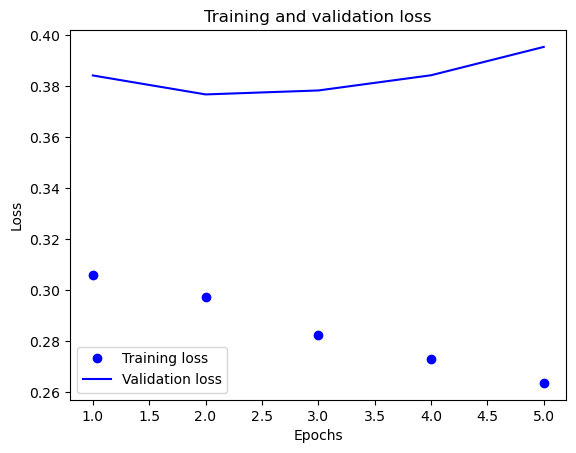

In [127]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

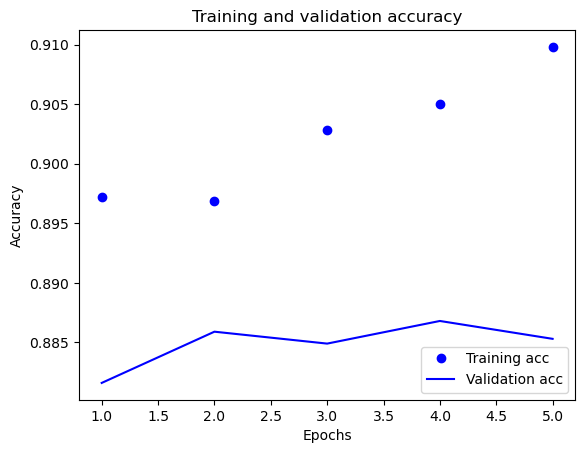

In [128]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()